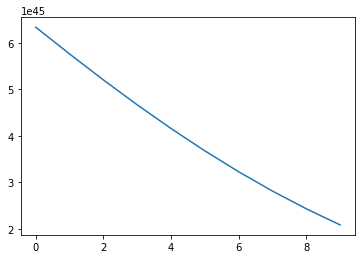

In [3]:
from scipy.special import binom
import matplotlib.pyplot as plt

n = 20
k = 10

def f(n, k, i):
    return binom(n-i-1, k-1) * 3**i * 2**(n - i - k)


x = list(range(n-k))
y = [f(100, 40, i) for i in x]

plt.plot(x, y)

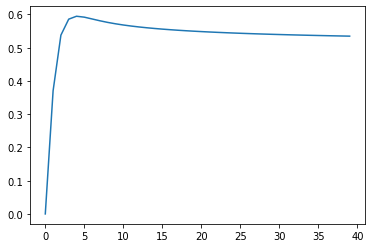

In [67]:
def f2(n, k):
    res = 0
    den = 3**n
    for i in range(n-k):
        res += f(n, k, i) / den
    return res 


x = list(range(40))
y = [f2(3*i, i) for i in x]
plt.plot(x, y)

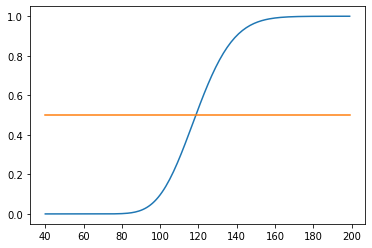

In [27]:

k = 40

x = list(range(40, 200))
y = [f2(n, k) for n in x]
plt.plot(x, y)
plt.plot(x, [0.5]*len(x))

In [72]:
def find_first(k):
    res = -1
    min_n = k
    max_n = 4*k
    if f2(max_n, k) < 0.99:
        return -1
    
    while abs(max_n - min_n) > 2:
        av_n = min_n + (max_n - min_n) // 2
        
        if f2(av_n, k) >= 0.99:
            max_n = av_n + 1
        else:
            min_n = av_n
            
    return min_n + 1

find_first(20)

-1

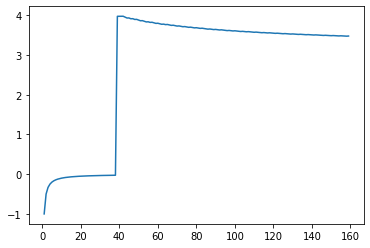

In [79]:
x = list(range(1, 160))
y = [find_first(i)/i for i in x]
plt.plot(x, y)

In [22]:
from src.source2 import *
from src.tools import *
from itertools import product

n = 3

w1 = []
w2 = []
w3 = []
per = []

for el in product('abc', repeat=n):
    tmp_el = from_string(el)
    w1.append(tmp_el[0].name)
    w2.append(tmp_el[1].name)
    w3.append(tmp_el[2].name)
    per.append(str(tmp_el.permutation))

In [30]:
for i, el in enumerate(product('abc', repeat=n)):
    print(''.join(el), w1[i].rjust(4), w2[i].rjust(4), w3[i].rjust(4), per[i].rjust(6))

# w = []
# dw = []
# for i, el in enumerate(product('abc', repeat=n)):
#     el = ''.join(el)
#     res = ''.join((w1[i] if w1[i] != 'e' else '', 
#                    w2[i] if w2[i] != 'e' else '', 
#                    w3[i] if w3[i] != 'e' else ''))
#     w.append(el)
#     dw.append(res)
#     print(el, res)

aaa    e    e  aaa (2)(0 1)
aab   aa    b    e  (0 2)
aac    c   aa    e  (1 2)
aba    b    a    a  (1 2)
abb    e   bb    a (2)(0 1)
abc   ac    e    b  (0 2)
aca    a    c    a  (0 2)
acb    e   ab    c  (1 2)
acc   cc    e    a (2)(0 1)
baa    e    b   aa  (0 2)
bab    a    b    b  (1 2)
bac   bc    a    e (2)(0 1)
bba   bb    e    a (2)(0 1)
bbb    e  bbb    e  (0 2)
bbc    c    e   bb  (1 2)
bca    e    c   ba  (1 2)
bcb    b    b    c (2)(0 1)
bcc   cc    b    e  (0 2)
caa    c    e   aa  (1 2)
cab    a   cb    e (2)(0 1)
cac    c    a    c  (0 2)
cba    b    e   ca  (0 2)
cbb    c   bb    e  (1 2)
cbc    c    c    b (2)(0 1)
cca    e   cc    a (2)(0 1)
ccb    e    b   cc  (0 2)
ccc  ccc    e    e  (1 2)


In [38]:
for el in product('abc', repeat=3):
    tmp = from_string(el)
    perm = tmp.permutation ** (-1)
    sons = [tmp[perm(0)].name, tmp[perm(1)].name, tmp[perm(2)].name]
    print(str(tmp).ljust(30), *map(lambda x: x.rjust(4), sons))

aaa = (2)(0 1) (e, e, aaa)        e    e  aaa
aab = (0 2) (aa, b, e)            e    b   aa
aac = (1 2) (c, aa, e)            c    e   aa
aba = (1 2) (b, a, a)             b    a    a
abb = (2)(0 1) (e, bb, a)        bb    e    a
abc = (0 2) (ac, e, b)            b    e   ac
aca = (0 2) (a, c, a)             a    c    a
acb = (1 2) (e, ab, c)            e    c   ab
acc = (2)(0 1) (cc, e, a)         e   cc    a
baa = (0 2) (e, b, aa)           aa    b    e
bab = (1 2) (a, b, b)             a    b    b
bac = (2)(0 1) (bc, a, e)         a   bc    e
bba = (2)(0 1) (bb, e, a)         e   bb    a
bbb = (0 2) (e, bbb, e)           e  bbb    e
bbc = (1 2) (c, e, bb)            c   bb    e
bca = (1 2) (e, c, ba)            e   ba    c
bcb = (2)(0 1) (b, b, c)          b    b    c
bcc = (0 2) (cc, b, e)            e    b   cc
caa = (1 2) (c, e, aa)            c   aa    e
cab = (2)(0 1) (a, cb, e)        cb    a    e
cac = (0 2) (c, a, c)             c    a    c
cba = (0 2) (b, e, ca)           c

In [28]:
from collections import Counter

Counter(dw).most_common()

[('caa', 2),
 ('baa', 2),
 ('bba', 2),
 ('acb', 2),
 ('cca', 2),
 ('bca', 2),
 ('cbb', 2),
 ('ccb', 2),
 ('aaa', 1),
 ('aab', 1),
 ('aca', 1),
 ('abc', 1),
 ('abb', 1),
 ('bbb', 1),
 ('cba', 1),
 ('bbc', 1),
 ('cac', 1),
 ('bcc', 1),
 ('ccc', 1)]

(array([243.,   0.,   0.,   0.,   0., 243.,   0.,   0.,   0., 243.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

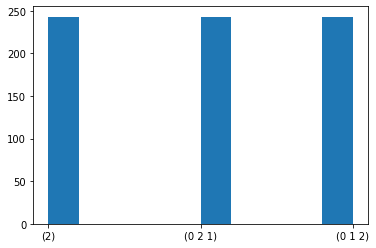

In [42]:
import matplotlib.pyplot as plt

n = 6

perms = []
for el in product('abc', repeat=n):
    tmp = from_string(el)
    perms.append(str(tmp.permutation))
    
plt.hist(perms)

In [8]:
from src.source2 import *
from itertools import product
from collections import Counter, defaultdict

found = defaultdict(set)

n = 7

for el in product('abc', repeat=n):
    el = ''.join(el)
    test = from_string(el)
    sons = test[0].name, test[1].name, test[2].name
    if sons in found and el not in found[sons]:
        print(f'element: {el.rjust(8)},    different elements: {str(found[sons]).rjust(10)},    sons: {str(sons).rjust(20)}')
    found[sons].add(el)


element:  aaabbaa,    different elements: {'aaaaabb'},    sons: ('e', 'bb', 'aaaaa')
element:  aaaccaa,    different elements: {'aaaaacc'},    sons: ('cc', 'e', 'aaaaa')
element:  aaaccbb,    different elements: {'aaabbcc'},    sons:  ('cc', 'bb', 'aaa')
element:  aabacaa,    different elements: {'aaaabac'},    sons:  ('bc', 'a', 'aaaa')
element:  aabbaaa,    different elements: {'aaaabba'},    sons: ('bb', 'e', 'aaaaa')
element:  aabbaab,    different elements: {'aaaabbb'},    sons: ('aaaa', 'bbb', 'e')
element:  aabbaac,    different elements: {'aaaabbc'},    sons:  ('c', 'aaaa', 'bb')
element:  aabbabc,    different elements: {'aaabcbb'},    sons:  ('aaac', 'bb', 'b')
element:  aabbbaa,    different elements: {'aabaabb'},    sons:  ('aa', 'bbb', 'aa')
element:  aabccaa,    different elements: {'aabaacc'},    sons:  ('aacc', 'b', 'aa')
element:  aabccbb,    different elements: {'aabbbcc'},    sons: ('aacc', 'bbb', 'e')
element:  aacabaa,    different elements: {'aaaacab'},    sons:  

element:  bbcbabb,    different elements: {'bbbbcba'},    sons:  ('b', 'bbbb', 'ca')
element:  bbcbbaa,    different elements: {'bbcaabb'},    sons:  ('c', 'bb', 'bbaa')
element:  bbccaaa,    different elements: {'bbaacca', 'aaccbba', 'aabbcca'},    sons:  ('bb', 'cc', 'aaa')
element:  bbccaab,    different elements: {'aabbccb', 'bbaaccb', 'aaccbbb'},    sons:  ('aa', 'bbb', 'cc')
element:  bbccaac,    different elements: {'aabbccc', 'bbaaccc', 'aaccbbc'},    sons:  ('ccc', 'aa', 'bb')
element:  bbccacb,    different elements: {'bbacbcc'},    sons:  ('cc', 'ab', 'bbc')
element:  bbccbba,    different elements: {'bbbbcca'},    sons:  ('bbbb', 'cc', 'a')
element:  bbccbbb,    different elements: {'bbbbccb'},    sons: ('e', 'bbbbb', 'cc')
element:  bbccbbc,    different elements: {'bbbbccc'},    sons: ('ccc', 'e', 'bbbb')
element:  bbccbca,    different elements: {'bbbcacc'},    sons:  ('cc', 'c', 'bbba')
element:  bbcccaa,    different elements: {'bbcaacc'},    sons: ('ccc', 'e', 'bbaa')

element:  cacbabb,    different elements: {'cabbcba'},    sons:  ('ab', 'cbb', 'ca')
element:  cacbbaa,    different elements: {'cacaabb'},    sons:  ('c', 'abb', 'caa')
element:  caccaaa,    different elements: {'caaacca'},    sons:  ('c', 'cc', 'aaaa')
element:  caccaab,    different elements: {'caaaccb'},    sons:  ('aaa', 'cb', 'cc')
element:  caccaac,    different elements: {'caaaccc'},    sons:  ('ccc', 'aaa', 'c')
element:  caccacb,    different elements: {'caacbcc'},    sons:  ('cc', 'aab', 'cc')
element:  caccbba,    different elements: {'cabbcca'},    sons:  ('cbb', 'cc', 'aa')
element:  caccbbb,    different elements: {'cabbccb'},    sons:  ('a', 'cbbb', 'cc')
element:  caccbbc,    different elements: {'cabbccc'},    sons:  ('ccc', 'a', 'cbb')
element:  caccbca,    different elements: {'cabcacc'},    sons:  ('cc', 'ac', 'cba')
element:  cacccaa,    different elements: {'cacaacc'},    sons:  ('ccc', 'a', 'caa')
element:  cacccbb,    different elements: {'cacbbcc'},    sons:  

element:  ccbabba,    different elements: {'cbbcbaa'},    sons:  ('bb', 'b', 'ccaa')
element:  ccbabbb,    different elements: {'cbbcbab'},    sons:  ('cca', 'bbb', 'b')
element:  ccbabbc,    different elements: {'cbbcbac'},    sons:  ('bc', 'cca', 'bb')
element:  ccbacaa,    different elements: {'aaccbac', 'ccaabac'},    sons:  ('bc', 'cca', 'aa')
element:  ccbbaaa,    different elements: {'aaccbba', 'aabbcca', 'bbaacca', 'bbccaaa', 'ccaabba'},    sons:  ('bb', 'cc', 'aaa')
element:  ccbbaab,    different elements: {'aaccbbb', 'ccaabbb', 'aabbccb', 'bbaaccb', 'bbccaab'},    sons:  ('aa', 'bbb', 'cc')
element:  ccbbaac,    different elements: {'bbccaac', 'ccaabbc', 'bbaaccc', 'aaccbbc', 'aabbccc'},    sons:  ('ccc', 'aa', 'bb')
element:  ccbbaba,    different elements: {'bbccaba'},    sons:  ('ccb', 'a', 'bba')
element:  ccbbabb,    different elements: {'bbccabb'},    sons:  ('bb', 'ccbb', 'a')
element:  ccbbabc,    different elements: {'ccabcbb', 'bbccabc'},    sons:  ('ac', 'bb', 'cc

In [11]:
# sorted(found, key=lambda x: len(found[x]), reverse=True)
found[('cc', 'bb', 'aaa')]

{'aaabbcc', 'aaaccbb', 'abbaacc', 'abbccaa', 'accaabb', 'accbbaa'}

In [ ]:
T(n, k) = 2T(n-1, k) + T(n-1, k-1),    T(n, k) = 3 * 2^(n - k - 1) binomial(n-1, k)